In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, explained_variance_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("FraudBankingData.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
list(df.columns)

['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [9]:
df["step"].nunique()

743

In [10]:
df["type"].nunique()

5

## Type
- converting and isolating into individusl columns

In [11]:
typeValues = pd.get_dummies(df["type"], drop_first=True)

In [12]:
df = pd.concat([df, typeValues], axis=1)

In [13]:
df.drop("type", axis=1, inplace=True)

## Name  Origin / Name Destination
- Removing String value to convert to numeric

In [14]:
df["nameOrig"] = pd.to_numeric([x[1:] for x in df["nameOrig"]])

In [15]:
df["nameDest"] = pd.to_numeric([x[1:] for x in df["nameDest"]])

In [16]:
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,1231006815,170136.00,160296.36,1979787155,0.00,0.00,0,0,0,0,1,0
1,1,1864.28,1666544295,21249.00,19384.72,2044282225,0.00,0.00,0,0,0,0,1,0
2,1,181.00,1305486145,181.00,0.00,553264065,0.00,0.00,1,0,0,0,0,1
3,1,181.00,840083671,181.00,0.00,38997010,21182.00,0.00,1,0,1,0,0,0
4,1,11668.14,2048537720,41554.00,29885.86,1230701703,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,786484425,339682.13,0.00,776919290,0.00,339682.13,1,0,1,0,0,0
6362616,743,6311409.28,1529008245,6311409.28,0.00,1881841831,0.00,0.00,1,0,0,0,0,1
6362617,743,6311409.28,1162922333,6311409.28,0.00,1365125890,68488.84,6379898.11,1,0,1,0,0,0
6362618,743,850002.52,1685995037,850002.52,0.00,2080388513,0.00,0.00,1,0,0,0,0,1


In [17]:
df.drop("isFlaggedFraud", axis=1, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   nameOrig        int64  
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   nameDest        int64  
 6   oldbalanceDest  float64
 7   newbalanceDest  float64
 8   isFraud         int64  
 9   CASH_OUT        uint8  
 10  DEBIT           uint8  
 11  PAYMENT         uint8  
 12  TRANSFER        uint8  
dtypes: float64(5), int64(4), uint8(4)
memory usage: 461.2 MB


In [19]:
df.corrwith(df.isFraud).sort_values(ascending = False)

isFraud           1.000000
amount            0.076688
TRANSFER          0.053869
step              0.031578
CASH_OUT          0.011256
oldbalanceOrg     0.010154
newbalanceDest    0.000535
nameOrig          0.000470
nameDest         -0.000141
DEBIT            -0.002911
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
PAYMENT          -0.025697
dtype: float64

<AxesSubplot:>

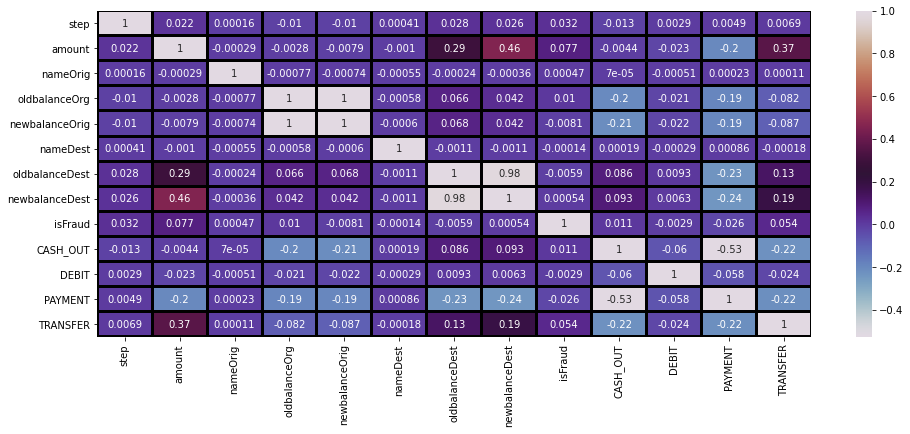

In [20]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot=True, linecolor="black", linewidths=2, cmap = "twilight")

In [21]:
df.drop("step", axis=1, inplace=True)

In [22]:
X = df.drop("isFraud", axis=1)
y = df["isFraud"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## logistic Regression

In [24]:
logModel = LogisticRegression(max_iter=300)

In [25]:
logModel.fit(X_train, y_train)

LogisticRegression(max_iter=300)

## Logistic Regression Predictions

In [26]:
logPred = logModel.predict(X_test)

## Log Metrics
- Data is pretty unbalanced favoring 0

In [27]:
print(classification_report(y_test, logPred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.63      0.45      0.53      2435

    accuracy                           1.00   1908786
   macro avg       0.82      0.73      0.76   1908786
weighted avg       1.00      1.00      1.00   1908786



<AxesSubplot:xlabel='isFraud', ylabel='count'>

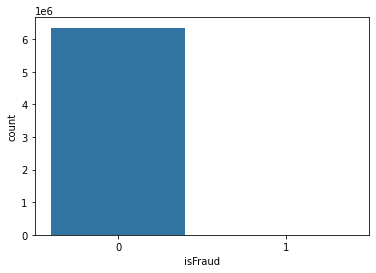

In [29]:
sns.countplot(x = df["isFraud"])

In [30]:
df["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

## Random Forest

In [62]:
rf = RandomForestClassifier(n_estimators=200)

In [63]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

## Random Forest Predictions

In [64]:
rmPred = rf.predict(X_test)

In [65]:
print(classification_report(y_test, rmPred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.97      0.74      0.84      2435

    accuracy                           1.00   1908786
   macro avg       0.99      0.87      0.92   1908786
weighted avg       1.00      1.00      1.00   1908786



In [32]:
import pickle

In [34]:
randomForestFilName = "RandomFOrestModel.pkl"

In [71]:
with open(randomForestFilName, "wb") as file:
    pickle.dump(rf, file)

In [36]:
with open(randomForestFilName, "rb") as file:
    pickelModel = pickle.load(file)

In [37]:
pred = pickelModel.predict(X_test)

In [38]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.97      0.74      0.84      2435

    accuracy                           1.00   1908786
   macro avg       0.99      0.87      0.92   1908786
weighted avg       1.00      1.00      1.00   1908786



In [39]:
fraud = df[df["isFraud"] == 1]

### Random Predicition

In [40]:
from random import randint
randomIndex = randint(0,len(fraud))
randomAccount = fraud.drop('isFraud', axis=1).iloc[randomIndex]

In [41]:
randomAccount

amount            1.586480e+06
nameOrig          1.097002e+08
oldbalanceOrg     1.586480e+06
newbalanceOrig    0.000000e+00
nameDest          5.468433e+08
oldbalanceDest    0.000000e+00
newbalanceDest    0.000000e+00
CASH_OUT          0.000000e+00
DEBIT             0.000000e+00
PAYMENT           0.000000e+00
TRANSFER          1.000000e+00
Name: 2787676, dtype: float64

In [42]:
X_train.shape

(4453834, 11)

In [43]:
randomAccount = randomAccount.values.reshape(1,11)

In [44]:
pickelModel.predict(randomAccount)

array([1])

## True Value

In [45]:
fraud.iloc[randomIndex]["isFraud"]

1.0

### KNearest Neighbors

In [46]:
knn = KNeighborsClassifier(n_neighbors=2)

In [47]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [48]:
knn.classes_

array([0, 1])

In [49]:
knn_pred = knn.predict(X_test)

In [50]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.00      0.00      0.00      2435

    accuracy                           1.00   1908786
   macro avg       0.50      0.50      0.50   1908786
weighted avg       1.00      1.00      1.00   1908786



## WE neeed to scale the data fpr the Knn classifier to improve predictions

In [51]:
scalar = StandardScaler()

In [52]:
scalar.fit(df.drop("isFraud", axis=1))

StandardScaler()

In [53]:
scaledData = scalar.transform(df.drop("isFraud", axis=1))

In [54]:
scaledDF = pd.DataFrame(scaledData, columns=X_train.columns)

In [55]:
X = scaledDF
y = df["isFraud"]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [57]:
kn_model = KNeighborsClassifier(n_neighbors=2)

In [ ]:
kn_model.fit(X_train,y_train)

In [ ]:
predictions = kn_model.predict(X_test)